# How to choose a successful movies genre?

I started my job from importing nessary libraries.

In [2]:
#import libraries for work
import numpy as np
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#connect to the created Database
conn = sqlite3.connect("movies_database.sqlite")
cur = conn.cursor()

In [61]:
#check list of tables
for row in cur.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('tmdb_movies',)
('imdb_title_crew',)
('tn_movie_budgets',)
('imdb_title_ratings',)
('imdb_name_basics',)
('imdb_title_akas',)
('bom_movie_gross',)
('imdb_title_basics',)
('rt_reviews',)


------------------------------
# Popularity vs Genre

I want to find the dependence of the popularity of films on their genre and budget. To do this, we work with several tables:

In [96]:
# for closer look on genres union two tables
# order by popularity
cur.execute('''SELECT *
               FROM tmdb_movies tmdb
               JOIN tn_movie_budgets tn
               ON tn.movie = tmdb.original_title
               JOIN imdb_title_basics imdb
               ON imdb.original_title = tn.movie
               ORDER BY popularity DESC
               LIMIT 200
            ''')
movies = pd.DataFrame(cur.fetchall())
movies.columns = [i[0] for i in cur.description]
movies.head(10)

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,...,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
1,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081,...,John Wick,"$30,000,000","$43,037,835","$76,235,001",tt2911666,John Wick,John Wick,2014,101.0,"Action,Crime,Thriller"
2,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392,...,The Hobbit: The Battle of the Five Armies,"$250,000,000","$255,119,788","$945,577,621",tt2310332,The Hobbit: The Battle of the Five Armies,The Hobbit: The Battle of the Five Armies,2014,144.0,"Adventure,Fantasy"
3,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,...,The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
4,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,...,The Avengers,"$60,000,000","$23,385,416","$48,585,416",tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
5,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958,...,Guardians of the Galaxy,"$170,000,000","$333,172,112","$770,867,516",tt2015381,Guardians of the Galaxy,Guardians of the Galaxy,2014,121.0,"Action,Adventure,Comedy"
6,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679,...,Blade Runner 2049,"$185,000,000","$92,054,159","$259,357,408",tt1856101,Blade Runner 2049,Blade Runner 2049,2017,164.0,"Drama,Mystery,Sci-Fi"
7,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679,...,Blade Runner 2049,"$185,000,000","$92,054,159","$259,357,408",tt1856101,Blade Runner 2049,Blade Runner 2049,2017,164.0,"Drama,Mystery,Sci-Fi"
8,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870,...,Fantastic Beasts: The Crimes of Grindelwald,"$200,000,000","$159,555,901","$652,220,086",tt4123430,Fantastic Beasts: The Crimes of Grindelwald,Fantastic Beasts: The Crimes of Grindelwald,2018,134.0,"Adventure,Family,Fantasy"
9,20618,"[28, 12, 878, 18]",315635,en,Spider-Man: Homecoming,46.775,2017-07-07,Spider-Man: Homecoming,7.4,11585,...,Spider-Man: Homecoming,"$175,000,000","$334,201,140","$880,166,350",tt2250912,Spider-Man: Homecoming,Spider-Man: Homecoming,2017,133.0,"Action,Adventure,Sci-Fi"


In [97]:
# work with column genre_ids to find a all genres
movies.genre_ids = movies.genre_ids.str.replace('[','')
movies.genre_ids = movies.genre_ids.str.replace(']','')
movies.genre_ids = movies.genre_ids.str.replace(', ',',')
movies.genre_ids = movies['genre_ids'].astype(str)
movies.head(1)

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,23811,"12,28,14",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,...,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


In [98]:
# split all genre_ids for work
movies['genre_ids'] = movies['genre_ids'].map(lambda x: x.split(",") if x else x)

In [118]:
# count genres id
all_genres =[]
none_counter = 0
for genre in movies['genre_ids']:
    if genre == None:
        none_counter += 1
    else:
        all_genres += genre
#all_genres        

In [111]:
# create set of unique genres
unique_genres = set(all_genres)
unique_genres

{'10402',
 '10749',
 '10751',
 '10752',
 '12',
 '14',
 '16',
 '18',
 '27',
 '28',
 '35',
 '36',
 '53',
 '80',
 '878',
 '9648'}

In [114]:
# How many movies we have in each genre?
genre_count = {}
for g in unique_genres:
    genre_count[g] = all_genres.count(g)

In [115]:
genre_count

{'27': 17,
 '10751': 52,
 '10402': 2,
 '14': 70,
 '80': 17,
 '36': 6,
 '18': 71,
 '9648': 10,
 '28': 98,
 '10749': 27,
 '12': 96,
 '53': 51,
 '16': 29,
 '10752': 9,
 '878': 60,
 '35': 38}

## What I can do with genres id?

I found that table **tmdb_movies** has only genre ids without information about it, but on the site https://developers.themoviedb.org/3/genres we can find this information using API. API request gives us JSON files with codes and names of genges and I create a dictionary.

In [103]:
#create a new dictionary for data
# worls log, should found a better solution
genres = {'28': 'Action',
'12': 'Adventure',
'16': 'Animation',
'35': 'Comedy',
'80': 'Crime',
'99': 'Documentary',
'18': 'Drama',
'10751': 'Family',
'14': 'Fantasy',
'36': 'History',
'27': 'Horror',
'10402': 'Music',
'9648': 'Mystery',
'10749': 'Romance',
'878': 'Science Fiction',
'10770': 'TV Movie',
'53': 'Thriller',
'10752': 'War',
'37': 'Western'}

In [116]:
# update genre_count by names from genres
result_table ={}
for g in genre_count.keys():
    result_table[genres[g]]=genre_count[g] 
result_table  

{'Horror': 17,
 'Family': 52,
 'Music': 2,
 'Fantasy': 70,
 'Crime': 17,
 'History': 6,
 'Drama': 71,
 'Mystery': 10,
 'Action': 98,
 'Romance': 27,
 'Adventure': 96,
 'Thriller': 51,
 'Animation': 29,
 'War': 9,
 'Science Fiction': 60,
 'Comedy': 38}

Text(0.5, 1.0, 'Top 200 Most Popular Movies')

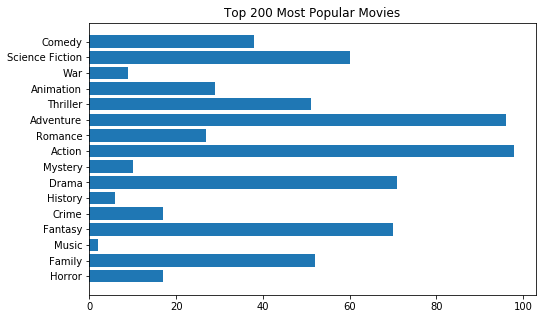

In [117]:
# add new labels for plot
values = []
labels = []

for genre, count in result_table.items():
    labels.append(genre)
    values.append(count)

plt.figure(figsize=(8, 5))
plt.barh(labels, values)
plt.title("Top 200 Most Popular Movies")

**The most popular genres are Action, Adventure, and Drama followed closely by Sci-Fi and Fantasy. Comedy and Family movies try to catch up**

---------

# Worldwide gross vs Genre

In [161]:
# for closer look on genres union two tables
# order by worl
cur.execute('''SELECT *
               FROM tmdb_movies tmdb
               JOIN tn_movie_budgets tn
               ON tn.movie = tmdb.original_title
               JOIN imdb_title_basics imdb
               ON imdb.original_title = tn.movie
               ORDER BY worldwide_gross DESC
               LIMIT 200
            ''')
movies1 = pd.DataFrame(cur.fetchall())
movies1.columns = [i[0] for i in cur.description]
movies1.tail(3)

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
197,11085,"[28, 878, 18]",110415,ko,Snowpiercer,14.735,2014-06-27,Snowpiercer,6.8,4748,...,Snowpiercer,"$40,000,000","$4,563,029","$88,069,880",tt1706620,Snowpiercer,Snowpiercer,2013,126.0,"Action,Drama,Sci-Fi"
198,5202,"[16, 35, 12, 10751]",57800,en,Ice Age: Continental Drift,17.537,2012-07-13,Ice Age: Continental Drift,6.3,4598,...,Ice Age: Continental Drift,"$95,000,000","$161,321,843","$879,765,137",tt1667889,Ice Age: Continental Drift,Ice Age: Continental Drift,2012,88.0,"Adventure,Animation,Comedy"
199,14175,"[28, 12, 80]",206647,en,Spectre,30.318,2015-11-06,Spectre,6.4,6719,...,Spectre,"$300,000,000","$200,074,175","$879,620,923",tt2379713,Spectre,Spectre,2015,148.0,"Action,Adventure,Thriller"


In [162]:
# work with column genre_ids to find a all genres
movies1.genre_ids = movies1.genre_ids.str.replace('[','')
movies1.genre_ids = movies1.genre_ids.str.replace(']','')
movies1.genre_ids = movies1.genre_ids.str.replace(', ',',')
movies1.genre_ids = movies1['genre_ids'].astype(str)
movies1.head(1)

,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2498,"27,53",49018,en,Insidious,16.197,2011-04-01,Insidious,6.9,3582,...,Insidious,"$1,500,000","$54,009,150","$99,870,886",tt1591095,Insidious,Insidious,2010,103.0,"Horror,Mystery,Thriller"


In [163]:
# split all genre_ids for work
movies1['genre_ids'] = movies1['genre_ids'].map(lambda x: x.split(",") if x else x)

In [164]:
# count genres id
all_genres1 =[]
none_counter = 0
for genre in movies1['genre_ids']:
    if genre == None:
        none_counter += 1
    else:
        all_genres1 += genre
#all_genres1  

In [165]:
# create set of unique genres
unique_genres = set(all_genres1)
unique_genres

{'10402',
 '10749',
 '10751',
 '10752',
 '12',
 '14',
 '16',
 '18',
 '27',
 '28',
 '35',
 '36',
 '37',
 '53',
 '80',
 '878',
 '9648',
 '99'}

In [166]:
# How many movies we have in each genre?
genre_count1 = {}
for g in unique_genres:
    genre_count1[g] = all_genres1.count(g)
genre_count1

{'35': 41,
 '10751': 21,
 '10402': 3,
 '14': 14,
 '80': 8,
 '36': 11,
 '37': 1,
 '18': 82,
 '99': 13,
 '28': 45,
 '9648': 14,
 '10749': 19,
 '12': 38,
 '53': 46,
 '16': 11,
 '10752': 4,
 '878': 8,
 '27': 44}

Text(0.5, 1.0, 'Top 200 Worldwide Gross Movies')

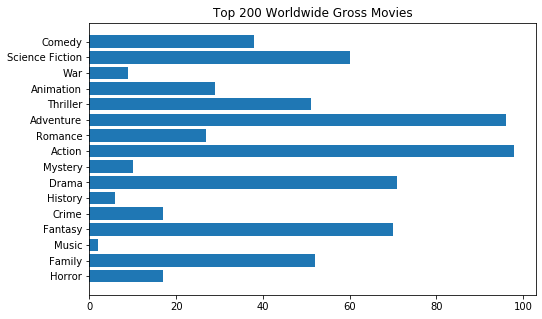

In [169]:
# add new labels for plot
values = []
labels = []

for genre, count in result_table.items():
    labels.append(genre)
    values.append(count)

plt.figure(figsize=(8, 5))
plt.barh(labels, values)
plt.title("Top 200 Worldwide Gross Movies")

Here Action and Adventure seem to be the most popular with Drama and Fantasy close behind. Sci-Fi tries to catch up. However, unlike the most profitable movies, Thriller and Animation also rank fairly high.